In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import vtk
from dataloading import loader
from vtk.util import numpy_support
from vedo import Mesh, Plotter, show, settings

In [3]:
mesh_filename = "data/lower/O52P1SZT/O52P1SZT_lower.obj"
labels_filename = "data/lower/O52P1SZT/O52P1SZT_lower.json"

In [4]:
# Loading the data
with open(labels_filename, "r") as file:
    labels = json.load(file)
polydata = loader.read_obj(mesh_filename)

In [5]:
# Check number of points/labels/instances
polydata_points = numpy_support.vtk_to_numpy(polydata.GetPoints().GetData())

assert len(polydata_points) == len(labels["labels"])
assert len(polydata_points) == len(labels["instances"])

In [6]:
# Add the objects to the plotter
# Convert the VTK PolyData to a vedo Mesh
vedo_mesh = Mesh(polydata)
vedo_mesh.cmap("jet", labels["labels"], on="points")

# Show the plot
show(vedo_mesh)

: 

: 

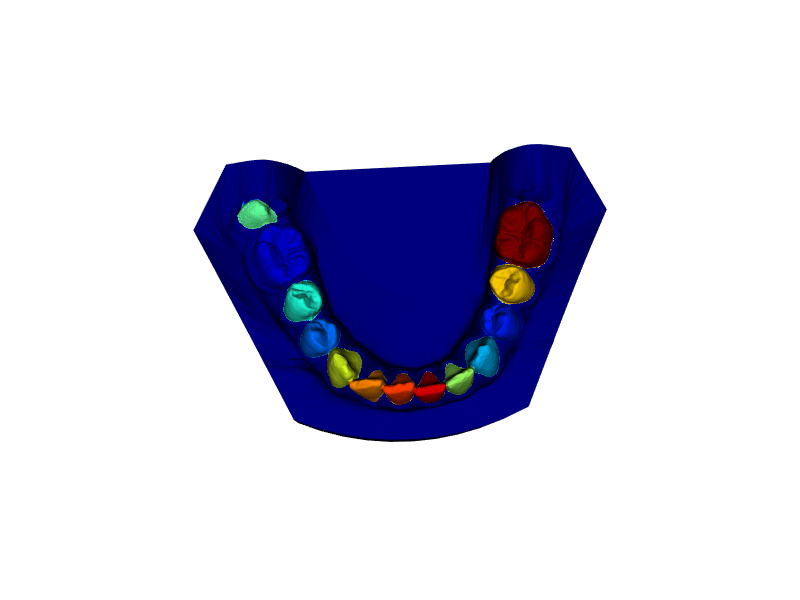

In [13]:
vedo_mesh = Mesh(polydata)
vedo_mesh.cmap("jet", labels["instances"], on="points")
show(vedo_mesh)